In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
df_recipes = pd.read_csv('/Users/arthurassis/Documents/CCT - Data Analytics for Business/Machine Learning/Semester 2/CA02-MachineLearning:DataVisualisation-Semester 2/archive/RAW_recipes.csv')

# Building a content based recommendation system

In [5]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [7]:
df_users = pd.read_csv('/Users/arthurassis/Documents/CCT - Data Analytics for Business/Machine Learning/Semester 2/CA02-MachineLearning:DataVisualisation-Semester 2/archive/RAW_interactions.csv')

In [8]:
df_users.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [9]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [10]:
recipe_rating = df_users.groupby(by = 'recipe_id')['rating'].mean()

In [11]:
recipe_rating

recipe_id
38        4.250000
39        3.000000
40        4.333333
41        4.500000
43        1.000000
            ...   
537459    5.000000
537485    5.000000
537543    0.000000
537671    0.000000
537716    5.000000
Name: rating, Length: 231637, dtype: float64

In [12]:
recipe_count = df_users.groupby(by = 'recipe_id').size()

In [13]:
recipe_count.sort_values(ascending=False)

recipe_id
2886      1613
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
307214       1
176578       1
176579       1
176581       1
537716       1
Length: 231637, dtype: int64

In [14]:
recipe_count = recipe_count.reset_index()

In [15]:
df_recipes.rename(columns = {'id':'recipe_id'}, inplace = True)

In [16]:
df_recipes = pd.merge(df_recipes, recipe_rating, on='recipe_id',
                      how='left')

In [17]:
df_recipes = pd.merge(df_recipes, recipe_count, on='recipe_id', how = 'left')

In [18]:
df_recipes.rename(columns = {0:'reviews_count'}, inplace = True)

In [19]:
df_recipes.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,reviews_count
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5,2
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,5.0,1


In [20]:
most_relevant_reviews = 40000

In [223]:
df_recipes = df_recipes.nlargest(most_relevant_reviews, 'reviews_count').reset_index()

In [224]:
df_recipes.to_csv('Filtered_recipes.csv', index=False)

In [22]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           40000 non-null  int64  
 1   name            40000 non-null  object 
 2   recipe_id       40000 non-null  int64  
 3   minutes         40000 non-null  int64  
 4   contributor_id  40000 non-null  int64  
 5   submitted       40000 non-null  object 
 6   tags            40000 non-null  object 
 7   nutrition       40000 non-null  object 
 8   n_steps         40000 non-null  int64  
 9   steps           40000 non-null  object 
 10  description     39131 non-null  object 
 11  ingredients     40000 non-null  object 
 12  n_ingredients   40000 non-null  int64  
 13  rating          40000 non-null  float64
 14  reviews_count   40000 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 4.6+ MB


In [23]:
rating_average = df_recipes['rating'].mean()
print(rating_average)

4.450785045245674


In [24]:
df_recipes.drop(columns = 'submitted', inplace = True)

In [25]:
df_recipes.description.head(10)

0    you'll never need another banana bread recipe ...
1    amazing flavor, and so simple! no salt needed ...
2    i love this crock-pot chicken recipe for two r...
3    n'awlin's style of chicken with an updated alf...
4    this is one of (if not) the best banana cake i...
5    absolutely delicious meatloaf and sauce! those...
6    my kids will give up a steak dinner for this s...
7    these are absolutely the chewiest, moistest, f...
8    cooking the meatballs in simmering pasta sauce...
9    we have a japanese girl, tomoko, living with u...
Name: description, dtype: object

In [26]:
print(df_recipes.tags[0])

['time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'north-american', 'breads', 'fruit', 'american', 'oven', 'dietary', 'quick-breads', 'equipment', '4-hours-or-less']


In [27]:
features = ['tags','ingredients']

In [28]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

for feature in features:
    df_recipes[feature] = df_recipes[feature].apply(literal_eval)

In [29]:
def get_first_five(x):
    return x[:5]

In [30]:
df_recipes['tags'] = df_recipes['tags'].apply(get_first_five)

In [31]:
#for feature in features:     
#    df_recipes[features] = df_recipes[features].apply(get_first_five)

In [32]:
print(df_recipes['tags'][3])

['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine']


In [33]:
print(df_recipes['ingredients'][3])

['boneless skinless chicken breast halves', 'linguine', 'cajun seasoning', 'butter', 'green onion', 'heavy whipping cream', 'sun-dried tomatoes', 'salt', 'dried basil', 'ground black pepper', 'garlic powder', 'parmesan cheese']


In [34]:
df_recipes[['tags', 'nutrition', 'ingredients']].head()

,tags,nutrition,ingredients
0,"[time-to-make, course, main-ingredient, cuisin...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]","[butter, granulated sugar, eggs, bananas, all-..."
1,"[weeknight, time-to-make, course, main-ingredi...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]","[beef roast, brown gravy mix, dried italian sa..."
2,"[time-to-make, course, main-ingredient, prepar...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]","[boneless chicken breasts, black beans, corn, ..."
3,"[30-minutes-or-less, time-to-make, course, mai...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]","[boneless skinless chicken breast halves, ling..."
4,"[weeknight, time-to-make, course, main-ingredi...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]","[bananas, lemon juice, flour, baking soda, sal..."


In [35]:
def create_soup(x):
    return ' '.join(x['tags']) + ' ' + x['nutrition'] + ' ' + ' '.join(x['ingredients'])

In [36]:
# Create a new soup feature
df_recipes['soup'] = df_recipes.apply(create_soup, axis=1)

In [37]:
df_recipes['soup'].head()

0    time-to-make course main-ingredient cuisine pr...
1    weeknight time-to-make course main-ingredient ...
2    time-to-make course main-ingredient preparatio...
3    30-minutes-or-less time-to-make course main-in...
4    weeknight time-to-make course main-ingredient ...
Name: soup, dtype: object

In [38]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_recipes['soup'])

In [39]:
count_matrix.shape

(40000, 5497)

In [38]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix[:40000], count_matrix[:40000])

NameError: name 'count_matrix' is not defined

In [40]:
# Reset index of your main DataFrame and construct reverse mapping as before
indices = pd.Series(df_recipes.index, index=df_recipes['name'])

In [41]:
print(indices[:25])

name
best banana bread                                              0
to die for crock pot roast                                     1
crock pot chicken with black beans   cream cheese              2
creamy cajun chicken pasta                                     3
best ever banana cake with cream cheese frosting               4
yes  virginia there is a great meatloaf                        5
jo mama s world famous spaghetti                               6
whatever floats your boat  brownies                            7
kittencal s italian melt in your mouth meatballs               8
japanese mum s chicken                                         9
creamy burrito casserole                                      10
kittencal s moist cheddar garlic oven fried chicken breast    11
banana banana bread                                           12
oven fried chicken chimichangas                               13
fannie farmer s classic baked macaroni   cheese               14
southern buttermilk 

In [42]:
indices['banana banana bread']

12

In [43]:
cosine_sim[12]

NameError: name 'cosine_sim' is not defined

In [44]:
cosine_sim.shape

NameError: name 'cosine_sim' is not defined

In [45]:
# Function that takes in Recipe name as input and outputs most similar recipes
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the recipes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar recipes
    sim_scores = sim_scores[1:11]

    # Get the recipes id
    recipes_id = [i[0] for i in sim_scores]

    # Return the top 10 most similar recipes
    return df_recipes['name'].iloc[recipes_id]

NameError: name 'cosine_sim' is not defined

In [46]:
get_recommendations('japanese mum s chicken')

NameError: name 'get_recommendations' is not defined

# Creating a Collaborative Filtering

Refer to: 
https://saturncloud.io/blog/how-to-select-rows-from-a-dataframe-based-on-list-values-in-a-column-in-pandas/#:~:text=To%20select%20rows%20from%20a%20DataFrame%20based%20on%20a%20list,to%20select%20the%20desired%20rows.
and
https://sparkbyexamples.com/pandas/conver-pandas-column-to-list/#

In [47]:
valid_recipes_id = df_recipes['recipe_id'].values.tolist()

In [48]:
valid_recipes_id

[2886,
 27208,
 89204,
 39087,
 67256,
 54257,
 22782,
 32204,
 69173,
 68955,
 33919,
 82102,
 25885,
 28148,
 135350,
 26110,
 99476,
 10744,
 129926,
 33671,
 63689,
 150863,
 97496,
 107786,
 5170,
 32614,
 95222,
 38298,
 77397,
 131018,
 29679,
 87782,
 4627,
 73166,
 50719,
 66121,
 141983,
 37336,
 28768,
 43509,
 60350,
 76864,
 150384,
 2496,
 27520,
 89207,
 31750,
 9272,
 92095,
 78814,
 132263,
 76930,
 53914,
 15411,
 8701,
 73825,
 90674,
 15242,
 32844,
 80156,
 261889,
 200296,
 63828,
 31128,
 71373,
 70165,
 33921,
 15865,
 26370,
 77585,
 34382,
 9836,
 33489,
 27144,
 114392,
 27210,
 66596,
 106251,
 52035,
 43023,
 63786,
 69630,
 205890,
 103215,
 26217,
 82925,
 128956,
 46922,
 95569,
 349246,
 15072,
 47195,
 16531,
 8782,
 108364,
 3470,
 107997,
 22176,
 48760,
 46877,
 133751,
 53878,
 65340,
 145038,
 63071,
 221743,
 56103,
 1356,
 87085,
 31717,
 48635,
 8739,
 29598,
 66703,
 4957,
 52488,
 80470,
 34499,
 49387,
 54351,
 222188,
 83524,
 26257,
 20616

In [49]:
mask = df_users['recipe_id'].isin(valid_recipes_id)

In [50]:
df_validusers = df_users[mask]

In [51]:
df_validusers

,user_id,recipe_id,date,rating,review
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!
10,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...
11,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...
...,...,...,...,...,...
1132356,199020,82303,2013-03-18,5,5 stars for taste! I had a hard time getting m...
1132357,1122988,82303,2014-07-08,5,This was amazingly delicious! The only change...
1132358,2000137415,82303,2015-04-13,1,I&#039;ve improvised sauces that turned out be...
1132359,2001898209,82303,2018-07-05,5,This is the best and easiest hot fudge ever. I...


In [52]:
df_validusers.drop(columns = 'date', inplace = True)

/var/folders/pn/wtyvdcd51cx9_tq1wmxkf7gc0000gn/T/ipykernel_8370/320351805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validusers.drop(columns = 'date', inplace = True)


In [53]:
users_count = df_validusers.groupby(by = 'user_id').size().reset_index()

In [54]:
users_count.rename(columns = {0:'count'}, inplace = True)

In [55]:
most_common_users = 10000

In [56]:
common_users = users_count.nlargest(most_common_users, 'count').reset_index()

In [57]:
common_users_id = common_users['user_id'].values.tolist()

In [58]:
df_sampleusers = df_validusers[df_validusers['user_id'].isin(common_users_id)]

In [59]:
df_sampleusers

,user_id,recipe_id,rating,review
8,76535,134728,4,Very good!
12,468945,134728,0,Made my own buttermilk w/ vinegar and milk. U...
13,255338,134728,5,First time using liquid smoke in a recipe. Mad...
20,202555,225241,5,My husband has just found out that he had to c...
21,353579,225241,5,"Very good, made with ingredients I usually hav..."
...,...,...,...,...
1132322,482933,290157,5,Perfect combination of flavors! I used this f...
1132354,143592,82303,5,I will never buy hot fudge again. This is so q...
1132355,140132,82303,5,This is fabulous. I made it for our dessert t...
1132356,199020,82303,5,5 stars for taste! I had a hard time getting m...


In [60]:
Mean = df_sampleusers.groupby(by="user_id",as_index=False)['rating'].mean()

In [61]:
rating_avg = pd.merge(df_sampleusers,Mean,on='user_id')

In [62]:
rating_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487266 entries, 0 to 487265
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    487266 non-null  int64  
 1   recipe_id  487266 non-null  int64  
 2   rating_x   487266 non-null  int64  
 3   review     487263 non-null  object 
 4   rating_y   487266 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 18.6+ MB


In [63]:
rating_avg.head()

,user_id,recipe_id,rating_x,review,rating_y
0,76535,134728,4,Very good!,4.158537
1,76535,79378,5,Frosty and delicious! I added more sugar to mi...,4.158537
2,76535,96091,2,This was just so-so.,4.158537
3,76535,36984,4,Very good!,4.158537
4,76535,70965,3,These were gooey and wonderful--and a perfect ...,4.158537


In [64]:
rating_avg.user_id.nunique()

10000

In [65]:
rating_avg.recipe_id.nunique()

39670

In [66]:
rating_avg['adg_rating']=rating_avg['rating_x']-rating_avg['rating_y']

In [67]:
check = pd.pivot_table(rating_avg,values='rating_x',index='user_id',columns='recipe_id')
check

recipe_id,40,49,58,62,66,91,93,112,142,143,...,524958,524960,528131,530004,530478,531172,532740,534900,536119,536678
user_id,,,,,,,,,,,,,,,,,,,,,
1533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001513060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001524408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001574271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
final = pd.pivot_table(rating_avg,values='adg_rating',index='user_id',columns='recipe_id')
final.head()

recipe_id,40,49,58,62,66,91,93,112,142,143,...,524958,524960,528131,530004,530478,531172,532740,534900,536119,536678
user_id,,,,,,,,,,,,,,,,,,,,,
1533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Replacing NaN by Recipe Average
final_recipe = final.fillna(final.mean(axis=0))

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [70]:
final_recipe.head()

recipe_id,40,49,58,62,66,91,93,112,142,143,...,524958,524960,528131,530004,530478,531172,532740,534900,536119,536678
user_id,,,,,,,,,,,,,,,,,,,,,
1533,0.169093,0.291155,-0.344436,0.062471,0.353991,0.247057,-0.148495,-0.949875,-0.246348,-0.125016,...,0.885281,1.048121,-1.5,0.090909,0.137931,-0.944444,0.208592,1.169811,0.165356,0.115399
1535,0.169093,0.291155,-0.344436,0.062471,0.353991,0.247057,-0.148495,-0.949875,-0.246348,-0.125016,...,0.885281,1.048121,-1.5,0.090909,0.137931,-0.944444,0.208592,1.169811,0.165356,0.115399
1634,0.169093,0.291155,-0.344436,0.062471,0.353991,0.247057,-0.148495,-0.949875,-0.246348,-0.125016,...,0.885281,1.048121,-1.5,0.090909,0.137931,-0.944444,0.208592,1.169811,0.165356,0.115399
1676,0.169093,0.291155,-0.344436,0.062471,0.353991,0.247057,-0.148495,-0.949875,-0.246348,-0.125016,...,0.885281,1.048121,-1.5,0.090909,0.137931,-0.944444,0.208592,1.169811,0.165356,0.115399
1792,0.169093,0.291155,-0.344436,0.062471,0.353991,0.247057,-0.148495,-0.949875,-0.246348,-0.125016,...,0.885281,1.048121,-1.5,0.090909,0.137931,-0.944444,0.208592,1.169811,0.165356,0.115399


In [71]:
final_user.head()

recipe_id,40,49,58,62,66,91,93,112,142,143,...,524958,524960,528131,530004,530478,531172,532740,534900,536119,536678
user_id,,,,,,,,,,,,,,,,,,,,,
1533,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,...,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16,2.478637e-16
1535,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,...,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16,-2.173745e-16
1634,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,...,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16,-1.837611e-16
1676,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,...,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16,4.099285e-16
1792,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,...,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16,-2.049643e-16


In [72]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

user_id,1533,1535,1634,1676,1792,1891,2148,2178,2310,2312,...,2001410644,2001415211,2001436530,2001453193,2001497311,2001513060,2001524408,2001574271,2001704911,2001836906
user_id,,,,,,,,,,,,,,,,,,,,,
1533,0.000000e+00,1.108474e-03,5.896334e-03,3.119971e-28,-2.330883e-28,3.690394e-28,-1.103125e-27,3.081488e-33,9.666505e-29,6.814081e-29,...,9.263510e-28,-1.402089e-28,4.007011e-28,1.924600e-29,0.0,-6.199008e-29,0.0,-3.151569e-29,8.503794e-28,-1.406591e-28
1535,1.108474e-03,0.000000e+00,1.046895e-29,-5.367374e-29,4.195889e-29,2.338683e-03,-1.697550e-02,3.047755e-03,1.573654e-03,2.058606e-03,...,-1.681622e-28,2.492038e-29,-7.338043e-29,-2.805863e-30,0.0,1.043014e-29,0.0,5.325269e-30,-1.447970e-02,2.895940e-03
1634,5.896334e-03,1.046895e-29,0.000000e+00,-8.714682e-29,6.501569e-29,-1.033063e-28,3.021501e-28,3.152333e-03,-1.290495e-02,-1.953989e-29,...,-2.575765e-28,3.889440e-29,-1.111419e-28,-5.278757e-30,0.0,1.728573e-29,0.0,8.447122e-30,-2.350778e-28,3.926008e-29
1676,3.119971e-28,-5.367374e-29,-8.714682e-29,0.000000e+00,-3.312674e-28,5.284733e-28,-1.565986e-27,-9.244464e-33,1.338472e-28,9.791651e-29,...,1.317941e-27,-1.990455e-28,5.734024e-28,2.150795e-29,0.0,1.290744e-02,0.0,-4.354383e-29,1.221653e-27,-2.016279e-28
1792,-2.330883e-28,4.195889e-29,6.501569e-29,-3.312674e-28,0.000000e+00,-3.926928e-28,1.172589e-27,-3.081488e-33,-1.044574e-28,-7.124799e-29,...,-9.829095e-28,1.508492e-28,-4.256728e-28,-2.053191e-29,0.0,6.537368e-29,0.0,3.313348e-29,-9.140395e-28,1.485061e-28


In [73]:
# user similarity on replacing NAN by item(recipe) avg
cosine = cosine_similarity(final_recipe)
np.fill_diagonal(cosine, 0 )
similarity_with_recipe = pd.DataFrame(cosine,index=final_recipe.index)
similarity_with_recipe.columns=final_user.index
similarity_with_recipe.head()

user_id,1533,1535,1634,1676,1792,1891,2148,2178,2310,2312,...,2001410644,2001415211,2001436530,2001453193,2001497311,2001513060,2001524408,2001574271,2001704911,2001836906
user_id,,,,,,,,,,,,,,,,,,,,,
1533,0.000000,0.983871,0.994094,0.998814,0.998474,0.998462,0.998950,0.998128,0.994324,0.995196,...,0.998914,0.998087,0.998667,0.996845,0.998932,0.996382,0.998967,0.996088,0.998950,0.996921
1535,0.983871,0.000000,0.979897,0.984514,0.984179,0.984168,0.984425,0.983855,0.980139,0.981076,...,0.984613,0.983798,0.984369,0.982574,0.984631,0.982117,0.984658,0.981828,0.984594,0.982663
1634,0.994094,0.979897,0.000000,0.994776,0.994438,0.994427,0.994912,0.994109,0.990162,0.991174,...,0.994877,0.994052,0.994630,0.992816,0.994894,0.992355,0.994929,0.992062,0.994912,0.992891
1676,0.998814,0.984514,0.994776,0.000000,0.999124,0.999113,0.999600,0.998778,0.994972,0.995844,...,0.999564,0.998736,0.999317,0.997494,0.999582,0.997088,0.999617,0.996737,0.999600,0.997570
1792,0.998474,0.984179,0.994438,0.999124,0.000000,0.998773,0.999260,0.998438,0.994633,0.995505,...,0.999224,0.998397,0.998977,0.997155,0.999242,0.996692,0.999277,0.996398,0.999260,0.997230


In [74]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [75]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
1533,75805,48430,41799,35794,183872,114317,231507,68727,403729,104600,...,120908,326540,43083,16667,59064,222064,463319,111045,573090,1363987
1535,30789,1328641,390553,1018899,177019,356985,81177,408707,637016,55225,...,105692,82227,437679,28345,152393,416537,189500,860538,225896,574083
1634,2185662,167527,478964,258739,66899,978876,394077,69260,180406,599284,...,28170,375186,66987,145375,41654,1361337,1588002,1139501,29794,78884
1676,433588,135542,177806,467341,304596,57491,173880,88826,382007,302618,...,344512,644902,2001513060,226989,214116,130219,106867,369956,57324,1145840
1792,105125,798181,289117,58469,160947,35106,600023,212497,139369,464189,...,39394,142463,222564,592474,285041,333562,1355867,840181,482583,237533


In [76]:
# top 30 neighbours for each user
sim_user_30_m = find_n_neighbours(similarity_with_recipe,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
user_id,,,,,,,,,,,,,,,,,,,,,
1533,75805,257653,491230,358905,158278,66398,1486414,321172,65166,139238,...,1346699,125736,2584272,186275,213467,164293,222535,226892,1142572,319539
1535,408707,16334,89015,128835,181319,30789,2584272,195534,487266,366385,...,134543,238046,18347,346101,92337,170853,239988,252729,266403,308474
1634,2185662,121807,66899,257653,491230,158278,358905,66398,1486414,321172,...,641632,335157,238046,1346699,125736,2584272,186275,213467,164293,222535
1676,177806,257653,491230,158278,358905,66398,1486414,321172,65166,139238,...,335157,238046,1346699,125736,2584272,186275,213467,164293,222535,1142572
1792,167140,167134,257653,491230,158278,358905,66398,1486414,321172,65166,...,163576,238046,1346699,125736,2584272,186275,213467,164293,222535,226892


In [77]:
def get_user_similar_movies( user1, user2 ):
    common_recipes = rating_avg[rating_avg.user_id == user1].merge(
    rating_avg[rating_avg.user_id == user2],
    on = "recipe_id",
    how = "inner" )
    return common_recipes.merge(df_recipes, on = 'recipe_id' )

In [78]:
a = get_user_similar_movies(353579,255338)
a = a.loc[ : , ['rating_x_x','rating_x_y','name']]
a.head()

,rating_x_x,rating_x_y,name
0,4,5,andes crme de menthe cookies andes mint cookies
1,4,5,crispy ginger beef
2,5,5,sue b s chocolate cake
3,5,5,schnecken sticky german cinnamon buns
4,5,5,teriyaki delight


In [79]:
df_sampleusers

,user_id,recipe_id,rating,review
8,76535,134728,4,Very good!
12,468945,134728,0,Made my own buttermilk w/ vinegar and milk. U...
13,255338,134728,5,First time using liquid smoke in a recipe. Mad...
20,202555,225241,5,My husband has just found out that he had to c...
21,353579,225241,5,"Very good, made with ingredients I usually hav..."
...,...,...,...,...
1132322,482933,290157,5,Perfect combination of flavors! I used this f...
1132354,143592,82303,5,I will never buy hot fudge again. This is so q...
1132355,140132,82303,5,This is fabulous. I made it for our dessert t...
1132356,199020,82303,5,5 stars for taste! I had a hard time getting m...


In [80]:
def User_item_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_recipe.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['user_id'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_recipe.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [82]:
rating_avg = rating_avg.astype({"recipe_id": str})
recipe_user = rating_avg.groupby(by = 'user_id')['recipe_id'].apply(lambda x:','.join(x))

In [83]:
def User_item_score1(user):
    recipes_made_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    d = recipe_user[recipe_user.index.isin(b)]
    l = ','.join(d.values)
    recipes_made_by_similar_users = l.split(',')
    recipes_under_consideration = list(set(recipes_made_by_similar_users)-set(list(map(str, recipes_made_by_user))))
    recipes_under_consideration = list(map(int, recipes_under_consideration))
    score = []
    for item in recipes_under_consideration:
        c = final_recipe.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['user_id'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_recipe.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'recipe_id':recipes_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Recipe_Name = top_5_recommendation.merge(df_recipes, how='inner', on='recipe_id')
    Recipe_Names = Recipe_Name.name.values.tolist()
    return Recipe_Names

In [86]:
user = int(input("Enter the user id to whom you want to recommend : "))
predicted_recipes = User_item_score1(user)
print(" ")
print("The Recommendations for User Id : {}".format(user))
print("   ")
for i in predicted_recipes:
    print(i)

Enter the user id to whom you want to recommend : 202555
 
The Recommendations for User Id : 202555
   
raspberry sherbet punch
meatballs with sauerkraut
a 1 dumplings
uncle bill s broccoli soup
cheesy alfredo sauce supreme


# Market Basket Analysis

It will be used in our case, the list of ingredients for recipes as our basket. It is interesting to analyse this scenario because companies that sell professional products for chefs or restaurants, may benefit from the analysis verifying which kind of products are necessary together in order to produce certain food.

In [219]:
# /Users/Jack/Documents/Projects/Whatscooking-/src

import pandas as pd 
import nltk
import string
import ast
import re
import unidecode
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import config 

# Weigths and measures are words that will not add value to the model. I got these standard words from 
# https://en.wikibooks.org/wiki/Cookbook:Units_of_measurement

# # We lemmatize the words to reduce them to their smallest form (lemmas). 
# lemmatizer = WordNetLemmatizer()
# measures = [lemmatizer.lemmatize(m) for m in measures]
# words_to_remove = [lemmatizer.lemmatize(m) for m in words_to_remove]

def ingredient_parser(ingreds):
    '''
    
    This function takes in a list (but it is a string as it comes from pandas dataframe) of 
       ingredients and performs some preprocessing. 
       For example:

       input = '['1 x 1.6kg whole duck', '2 heaped teaspoons Chinese five-spice powder', '1 clementine',
                 '6 fresh bay leaves', 'GRAVY', '', '1 bulb of garlic', '2 carrots', '2 red onions', 
                 '3 tablespoons plain flour', '100 ml Marsala', '1 litre organic chicken stock']'
       
       output = ['duck', 'chinese five spice powder', 'clementine', 'fresh bay leaf', 'gravy', 'garlic',
                 'carrot', 'red onion', 'plain flour', 'marsala', 'organic chicken stock']

    '''
    measures = ['teaspoon', 't', 'tsp.', 'tablespoon', 'T', 'tbl.', 'tb', 'tbsp.', 'fluid ounce', 'fl oz', 'gill', 'cup', 'c', 'pint', 'p', 'pt', 'fl pt', 'quart', 'q', 'qt', 'fl qt', 'gallon', 'g', 'gal', 'ml', 'milliliter', 'millilitre', 'cc', 'mL', 'l', 'liter', 'litre', 'L', 'dl', 'deciliter', 'decilitre', 'dL', 'bulb', 'level', 'heaped', 'rounded', 'whole', 'pinch', 'medium', 'slice', 'pound', 'lb', '#', 'ounce', 'oz', 'mg', 'milligram', 'milligramme', 'g', 'gram', 'gramme', 'kg', 'kilogram', 'kilogramme', 'x', 'of', 'mm', 'millimetre', 'millimeter', 'cm', 'centimeter', 'centimetre', 'm', 'meter', 'metre', 'inch', 'in', 'milli', 'centi', 'deci', 'hecto', 'kilo']
    words_to_remove = ['fresh', 'oil', 'a', 'red', 'bunch', 'and', 'clove', 'or', 'leaf', 'chilli', 'large', 'extra', 'sprig', 'ground', 'handful', 'free', 'small', 'pepper', 'virgin', 'range', 'from', 'dried', 'sustainable', 'black', 'peeled', 'higher', 'welfare', 'seed', 'for', 'finely', 'freshly', 'sea', 'quality', 'white', 'ripe', 'few', 'piece', 'source', 'to', 'organic', 'flat', 'smoked', 'ginger', 'sliced', 'green', 'picked', 'the', 'stick', 'plain', 'plus', 'mixed', 'mint', 'bay', 'basil', 'your', 'cumin', 'optional', 'fennel', 'serve', 'mustard', 'unsalted', 'baby', 'paprika', 'fat', 'ask', 'natural', 'skin', 'roughly', 'into', 'such', 'cut', 'good', 'brown', 'grated', 'trimmed', 'oregano', 'powder', 'yellow', 'dusting', 'knob', 'frozen', 'on', 'deseeded', 'low', 'runny', 'balsamic', 'cooked', 'streaky', 'nutmeg', 'sage', 'rasher', 'zest', 'pin', 'groundnut', 'breadcrumb', 'turmeric', 'halved', 'grating', 'stalk', 'light', 'tinned', 'dry', 'soft', 'rocket', 'bone', 'colour', 'washed', 'skinless', 'leftover', 'splash', 'removed', 'dijon', 'thick', 'big', 'hot', 'drained', 'sized', 'chestnut', 'watercress', 'fishmonger', 'english', 'dill', 'caper', 'raw', 'worcestershire', 'flake', 'cider', 'cayenne', 'tbsp', 'leg', 'pine', 'wild', 'if', 'fine', 'herb', 'almond', 'shoulder', 'cube', 'dressing', 'with', 'chunk', 'spice', 'thumb', 'garam', 'new', 'little', 'punnet', 'peppercorn', 'shelled', 'saffron', 'other''chopped', 'salt', 'olive', 'taste', 'can', 'sauce', 'water', 'diced', 'package', 'italian', 'shredded', 'divided', 'parsley', 'vinegar', 'all', 'purpose', 'crushed', 'juice', 'more', 'coriander', 'bell', 'needed', 'thinly', 'boneless', 'half', 'thyme', 'cubed', 'cinnamon', 'cilantro', 'jar', 'seasoning', 'rosemary', 'extract', 'sweet', 'baking', 'beaten', 'heavy', 'seeded', 'tin', 'vanilla', 'uncooked', 'crumb', 'style', 'thin', 'nut', 'coarsely', 'spring', 'chili', 'cornstarch', 'strip', 'cardamom', 'rinsed', 'honey', 'cherry', 'root', 'quartered', 'head', 'softened', 'container', 'crumbled', 'frying', 'lean', 'cooking', 'roasted', 'warm', 'whipping', 'thawed', 'corn', 'pitted', 'sun', 'kosher', 'bite', 'toasted', 'lasagna', 'split', 'melted', 'degree', 'lengthwise', 'romano', 'packed', 'pod', 'anchovy', 'rom', 'prepared', 'juiced', 'fluid', 'floret', 'room', 'active', 'seasoned', 'mix', 'deveined', 'lightly', 'anise', 'thai', 'size', 'unsweetened', 'torn', 'wedge', 'sour', 'basmati', 'marinara', 'dark', 'temperature', 'garnish', 'bouillon', 'loaf', 'shell', 'reggiano', 'canola', 'parmigiano', 'round', 'canned', 'ghee', 'crust', 'long', 'broken', 'ketchup', 'bulk', 'cleaned', 'condensed', 'sherry', 'provolone', 'cold', 'soda', 'cottage', 'spray', 'tamarind', 'pecorino', 'shortening', 'part', 'bottle', 'sodium', 'cocoa', 'grain', 'french', 'roast', 'stem', 'link', 'firm', 'asafoetida', 'mild', 'dash', 'boiling']
    # The ingredient list is now a string so we need to turn it back into a list. We use ast.literal_eval
    if isinstance(ingreds, list):
        ingredients = ingreds
    else:
        ingredients = ast.literal_eval(ingreds)
    # We first get rid of all the punctuation. We make use of str.maketrans. It takes three input 
    # arguments 'x', 'y', 'z'. 'x' and 'y' must be equal-length strings and characters in 'x'
    # are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character
    #  in the string is mapped to None. 
    translator = str.maketrans('', '', string.punctuation)
    lemmatizer = WordNetLemmatizer()
    ingred_list = []
    for i in ingredients:
        i.translate(translator)
        # We split up with hyphens as well as spaces
        items = re.split(' |-', i)
        # Get rid of words containing non alphabet letters
        items = [word for word in items if word.isalpha()]
        # Turn everything to lowercase
        items = [word.lower() for word in items]
        # remove accents
        items = [unidecode.unidecode(word) for word in items] #''.join((c for c in unicodedata.normalize('NFD', items) if unicodedata.category(c) != 'Mn'))
        # Lemmatize words so we can compare words to measuring words
        items = [lemmatizer.lemmatize(word) for word in items]
        # Gets rid of measuring words/phrases, e.g. heaped teaspoon
        items = [word for word in items if word not in measures]
        # Get rid of common easy words
        items = [word for word in items if word not in words_to_remove]
        if items:
            ingred_list.append(' '.join(items)) 
    ingred_list = " ".join(ingred_list)
    return ingred_list

In [220]:
measures = ['teaspoon', 't', 'tsp.', 'tablespoon', 'T', 'tbl.', 'tb', 'tbsp.', 'fluid ounce', 'fl oz', 'gill', 'cup', 'c', 'pint', 'p', 'pt', 'fl pt', 'quart', 'q', 'qt', 'fl qt', 'gallon', 'g', 'gal', 'ml', 'milliliter', 'millilitre', 'cc', 'mL', 'l', 'liter', 'litre', 'L', 'dl', 'deciliter', 'decilitre', 'dL', 'bulb', 'level', 'heaped', 'rounded', 'whole', 'pinch', 'medium', 'slice', 'pound', 'lb', '#', 'ounce', 'oz', 'mg', 'milligram', 'milligramme', 'g', 'gram', 'gramme', 'kg', 'kilogram', 'kilogramme', 'x', 'of', 'mm', 'millimetre', 'millimeter', 'cm', 'centimeter', 'centimetre', 'm', 'meter', 'metre', 'inch', 'in', 'milli', 'centi', 'deci', 'hecto', 'kilo']
words_to_remove = ['fresh', 'oil', 'a', 'red', 'bunch', 'and', 'clove', 'or', 'leaf', 'chilli', 'large', 'extra', 'sprig', 'ground', 'handful', 'free', 'small', 'pepper', 'virgin', 'range', 'from', 'dried', 'sustainable', 'black', 'peeled', 'higher', 'welfare', 'seed', 'for', 'finely', 'freshly', 'sea', 'quality', 'white', 'ripe', 'few', 'piece', 'source', 'to', 'organic', 'flat', 'smoked', 'ginger', 'sliced', 'green', 'picked', 'the', 'stick', 'plain', 'plus', 'mixed', 'mint', 'bay', 'basil', 'your', 'cumin', 'optional', 'fennel', 'serve', 'mustard', 'unsalted', 'baby', 'paprika', 'fat', 'ask', 'natural', 'skin', 'roughly', 'into', 'such', 'cut', 'good', 'brown', 'grated', 'trimmed', 'oregano', 'powder', 'yellow', 'dusting', 'knob', 'frozen', 'on', 'deseeded', 'low', 'runny', 'balsamic', 'cooked', 'streaky', 'nutmeg', 'sage', 'rasher', 'zest', 'pin', 'groundnut', 'breadcrumb', 'turmeric', 'halved', 'grating', 'stalk', 'light', 'tinned', 'dry', 'soft', 'rocket', 'bone', 'colour', 'washed', 'skinless', 'leftover', 'splash', 'removed', 'dijon', 'thick', 'big', 'hot', 'drained', 'sized', 'chestnut', 'watercress', 'fishmonger', 'english', 'dill', 'caper', 'raw', 'worcestershire', 'flake', 'cider', 'cayenne', 'tbsp', 'leg', 'pine', 'wild', 'if', 'fine', 'herb', 'almond', 'shoulder', 'cube', 'dressing', 'with', 'chunk', 'spice', 'thumb', 'garam', 'new', 'little', 'punnet', 'peppercorn', 'shelled', 'saffron', 'other''chopped', 'salt', 'olive', 'taste', 'can', 'sauce', 'water', 'diced', 'package', 'italian', 'shredded', 'divided', 'parsley', 'vinegar', 'all', 'purpose', 'crushed', 'juice', 'more', 'coriander', 'bell', 'needed', 'thinly', 'boneless', 'half', 'thyme', 'cubed', 'cinnamon', 'cilantro', 'jar', 'seasoning', 'rosemary', 'extract', 'sweet', 'baking', 'beaten', 'heavy', 'seeded', 'tin', 'vanilla', 'uncooked', 'crumb', 'style', 'thin', 'nut', 'coarsely', 'spring', 'chili', 'cornstarch', 'strip', 'cardamom', 'rinsed', 'honey', 'cherry', 'root', 'quartered', 'head', 'softened', 'container', 'crumbled', 'frying', 'lean', 'cooking', 'roasted', 'warm', 'whipping', 'thawed', 'corn', 'pitted', 'sun', 'kosher', 'bite', 'toasted', 'lasagna', 'split', 'melted', 'degree', 'lengthwise', 'romano', 'packed', 'pod', 'anchovy', 'rom', 'prepared', 'juiced', 'fluid', 'floret', 'room', 'active', 'seasoned', 'mix', 'deveined', 'lightly', 'anise', 'thai', 'size', 'unsweetened', 'torn', 'wedge', 'sour', 'basmati', 'marinara', 'dark', 'temperature', 'garnish', 'bouillon', 'loaf', 'shell', 'reggiano', 'canola', 'parmigiano', 'round', 'canned', 'ghee', 'crust', 'long', 'broken', 'ketchup', 'bulk', 'cleaned', 'condensed', 'sherry', 'provolone', 'cold', 'soda', 'cottage', 'spray', 'tamarind', 'pecorino', 'shortening', 'part', 'bottle', 'sodium', 'cocoa', 'grain', 'french', 'roast', 'stem', 'link', 'firm', 'asafoetida', 'mild', 'dash', 'boiling']

In [221]:
df_recipes['ingredients']

0        [butter, granulated sugar, eggs, bananas, all-...
1        [beef roast, brown gravy mix, dried italian sa...
2        [boneless chicken breasts, black beans, corn, ...
3        [boneless skinless chicken breast halves, ling...
4        [bananas, lemon juice, flour, baking soda, sal...
                               ...                        
39995    [eggs, potatoes, onion, white pepper, butter, ...
39996    [hard-boiled eggs, smoked salmon, butter, sour...
39997    [hellmanns mayonnaise, water, tomato paste, bu...
39998    [spiral shaped pasta, roma tomatoes, red onion...
39999    [ground beef, bacon, onion, ketchup, salt, bro...
Name: ingredients, Length: 40000, dtype: object

In [222]:
df_recipes['ingredients_parsed'] = df_recipes['ingredients'].apply(lambda x: ingredient_parser(x))

KeyboardInterrupt: 

In [ ]:
ingredients = df_recipes['ingredients_parsed'].values.tolist()

In [ ]:
ingredients

In [170]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Create an object te by calling a method TransactionEncoder()
te = TransactionEncoder()

# Call fit() method to train the model
te_array = te.fit(ingredients).transform(ingredients)

# Transform te_array into dataframe
EncodedIngredients = pd.DataFrame(te_array, columns = te.columns_)

In [171]:
EncodedIngredients

,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,True,True,True,False,True,True,True,True,False,False,...,False,True,True,True,True,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,False,...,False,True,True,False,False,True,False,False,True,False
2,True,True,True,True,False,True,False,False,True,True,...,False,True,True,True,False,False,False,False,False,False
3,True,True,True,True,False,True,False,True,True,True,...,False,True,True,True,True,False,False,False,False,False
4,True,True,True,True,False,True,True,True,True,True,...,False,True,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,True,True,True,False,False,True,False,True,False,True,...,False,True,True,True,True,False,False,False,False,False
39996,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,False,True,False,False,False
39997,True,True,True,True,False,True,False,True,True,True,...,False,True,True,True,True,False,False,False,True,False
39998,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,False,True,False,False,False


In [91]:
from mlxtend.frequent_patterns import apriori

# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_ap = apriori(EncodedIngredients, min_support = 0.005, use_colnames = True)

In [92]:
frequent_itemsets_ap.sort_values(by = 'support', ascending = False)

,support,itemsets
211,0.401475,(salt)
35,0.259425,(butter)
232,0.203850,(sugar)
177,0.172725,(onion)
252,0.157650,(water)
...,...,...
1341,0.005000,"(salt, flour, margarine)"
405,0.005000,"(butter, carrot)"
1755,0.005000,"(sugar, baking powder, flour, butter, vanilla)"
352,0.005000,"(oregano, basil)"


In [93]:
from mlxtend.frequent_patterns import association_rules

# Display the reles due to apriori algorithm
rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.4)

print(rules_ap)

                          antecedents          consequents  \
0                  (active dry yeast)               (salt)   
1                  (active dry yeast)              (sugar)   
2                 (all-purpose flour)             (butter)   
3                  (granulated sugar)  (all-purpose flour)   
4                 (all-purpose flour)               (salt)   
...                               ...                  ...   
2359    (butter, vanilla, salt, eggs)       (sugar, flour)   
2360  (butter, vanilla, sugar, flour)         (eggs, salt)   
2361    (vanilla, eggs, sugar, flour)       (butter, salt)   
2362   (butter, vanilla, eggs, sugar)        (salt, flour)   
2363   (butter, vanilla, eggs, flour)        (salt, sugar)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.009150            0.401475  0.008225    0.898907  2.239011   
1               0.009150            0.203850  0.005050    0.551913  2.707445   
2              

In [94]:
from mlxtend.frequent_patterns import fpgrowth

In [98]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = fpgrowth(EncodedIngredients, min_support = 0.005, use_colnames = True)

print(frequent_itemsets_fp1)

       support                            itemsets
0     0.401475                              (salt)
1     0.259425                            (butter)
2     0.149300                              (eggs)
3     0.082075                 (all-purpose flour)
4     0.071925                       (baking soda)
...        ...                                 ...
1801  0.010275           (salt, whole wheat flour)
1802  0.006450    (baking soda, whole wheat flour)
1803  0.006025  (baking powder, whole wheat flour)
1804  0.006400                (salt, curry powder)
1805  0.005100               (curry powder, onion)

[1806 rows x 2 columns]


In [100]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "confidence", min_threshold = 0.5)

print(rules_fp1)

                antecedents     consequents  antecedent support  \
0                    (eggs)          (salt)            0.149300   
1            (butter, eggs)          (salt)            0.064175   
2             (eggs, sugar)          (salt)            0.059050   
3             (eggs, sugar)        (butter)            0.059050   
4     (butter, eggs, sugar)          (salt)            0.031125   
...                     ...             ...                 ...   
1440           (canola oil)          (salt)            0.017750   
1441     (ground coriander)  (ground cumin)            0.008950   
1442     (ground coriander)          (salt)            0.008950   
1443    (whole wheat flour)          (salt)            0.013050   
1444         (curry powder)          (salt)            0.012700   

      consequent support   support  confidence       lift  leverage  \
0               0.401475  0.083025    0.556095   1.385130  0.023085   
1               0.401475  0.037625    0.586287   1.46

# Building a Dashboard to visualise the data

In [101]:
df_recipes.head()

,index,name,recipe_id,minutes,contributor_id,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,reviews_count,soup
0,22168,best banana bread,2886,65,1762,"[time-to-make, course, main-ingredient, cuisin...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"[butter, granulated sugar, eggs, bananas, all-...",8,4.185989,1613,time-to-make course main-ingredient cuisine pr...
1,213826,to die for crock pot roast,27208,545,28201,"[weeknight, time-to-make, course, main-ingredi...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","[beef roast, brown gravy mix, dried italian sa...",5,4.288570,1601,weeknight time-to-make course main-ingredient ...
2,66687,crock pot chicken with black beans cream cheese,89204,243,137839,"[time-to-make, course, main-ingredient, prepar...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,"[boneless chicken breasts, black beans, corn, ...",5,4.220393,1579,time-to-make course main-ingredient preparatio...
3,62431,creamy cajun chicken pasta,39087,25,30534,"[30-minutes-or-less, time-to-make, course, mai...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4,['place chicken and cajun seasoning in a bowl ...,n'awlin's style of chicken with an updated alf...,"[boneless skinless chicken breast halves, ling...",12,4.541436,1448,30-minutes-or-less time-to-make course main-in...
4,22388,best ever banana cake with cream cheese frosting,67256,75,82367,"[weeknight, time-to-make, course, main-ingredi...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18,"['preheat oven to 275f', 'grease and flour a 9...",this is one of (if not) the best banana cake i...,"[bananas, lemon juice, flour, baking soda, sal...",13,4.329047,1322,weeknight time-to-make course main-ingredient ...


In [117]:
df_recipes['word_count_on_steps'] = df_recipes['steps'].apply(lambda x: len(str(x).split(" ")))

In [118]:
print(df_recipes['steps'][0])

['remove odd pots and pans from oven', 'preheat oven to 350 / 180', 'cream together butter and sugar', 'add eggs and crushed bananas', 'combine well', 'sift together flour , soda and salt', 'add to creamed mixture', 'add vanilla', 'mix just until combined', 'do not overmix', 'pour into greased and floured loaf pan', 'bake at 350 / 180 for 55 minutes', 'keeps well , refrigerated']


In [120]:
df_recipes[['name','word_count_on_steps']]

,name,word_count_on_steps
0,best banana bread,64
1,to die for crock pot roast,59
2,crock pot chicken with black beans cream cheese,69
3,creamy cajun chicken pasta,68
4,best ever banana cake with cream cheese frosting,182
...,...,...
39995,norwegian scrambled eggs with smoked salmon an...,76
39996,norwegian stuffed eggs,46
39997,not a secret anymore japanese steakhouse whi...,69
39998,not just another pasta salad,62


In [113]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
df_recipes['avg_word'] = df_recipes['steps'].apply(lambda x: avg_word(x)) 
df_recipes[['name','avg_word']].head()

,name,avg_word
0,best banana bread,4.984375
1,to die for crock pot roast,4.322034
2,crock pot chicken with black beans cream cheese,3.724638
3,creamy cajun chicken pasta,4.352941
4,best ever banana cake with cream cheese frosting,4.302198


In [121]:
df_recipes['words_per_step'] = df_recipes['word_count_on_steps']/df_recipes['n_steps']

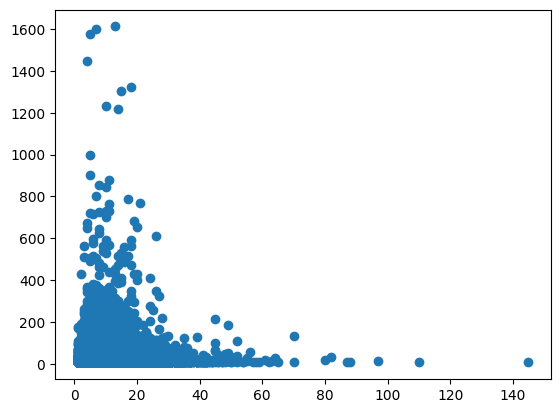

In [131]:
plt.scatter(data= df_recipes, x = 'n_steps', y = 'reviews_count')

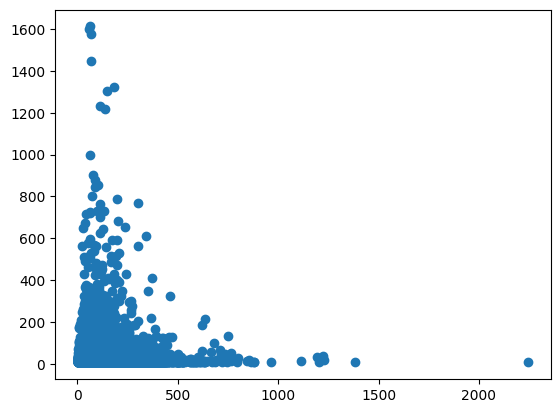

In [125]:
plt.scatter(data= df_recipes, x = 'word_count_on_steps', y = 'reviews_count')

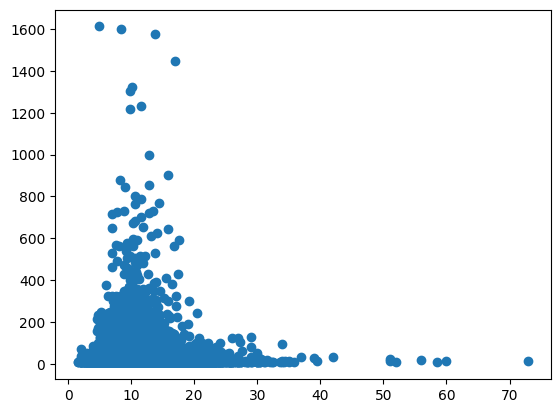

In [128]:
plt.scatter(data= df_recipes, x = 'words_per_step', y = 'reviews_count')

(0.0, 1000.0)

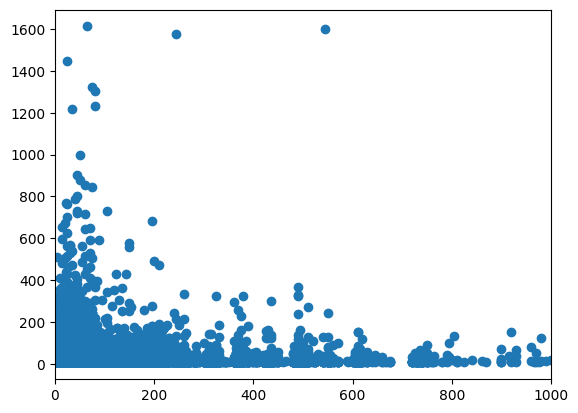

In [135]:
plt.scatter(data= df_recipes, x = 'minutes', y = 'reviews_count')
plt.xlim((0, 1000))

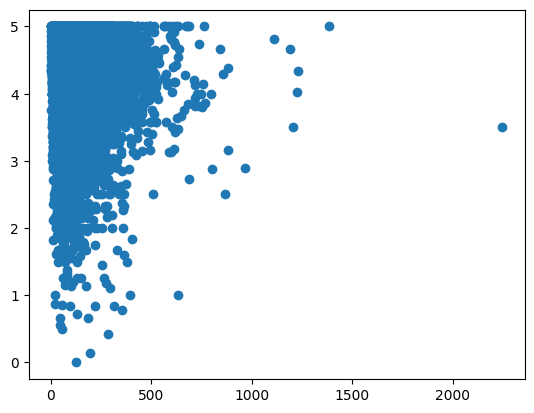

In [141]:
plt.scatter(data= df_recipes, x = 'word_count_on_steps', y = 'rating')

In [142]:
df_users.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
